# Abstract
The aim of the "Data Science Salaries" project is to analyze the factors that affect the salaries of data scientists. In recent years, the demand for skilled data scientists has increased rapidly, and as a result, the salaries of data scientists have also increased. This project focuses on exploring the various factors that contribute to these salary variations, including industry, education level, job title, years of experience, location, and skills.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/content/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


There no  nulls in the data set

There 11 columns in the data

int: salary, salary_in_usd, remote ratio, and date

object: 'experience_level', 'employment_type', 'job_title',
       'salary_currency', 'employee_residence',
       'company_location', 'company_size'

In [5]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

##Study relations in the data

In [8]:
int_cols = df.select_dtypes(include=['int'])
int_cols.head()

,work_year,salary,salary_in_usd,remote_ratio
0,2020,70000,79833,0
1,2020,260000,260000,0
2,2020,85000,109024,50
3,2020,20000,20000,0
4,2020,150000,150000,50


In [9]:
# study the relations in int data
int_cols['work_year'].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

In [ ]:
# there a tree years, and with time the the number of jobs increase from 
# 2022 -> 318
# 2021 -> 217
# 2020 -> 72

In [10]:
# there two salary column, at the country currency and in dollar, 
# this multicolinearity so, drop the salery and work only with salary in usd column, cause its more common and easy to understand
int_cols.drop('salary',axis=1,inplace=True)

# drop it from original data frame
df.drop('salary',axis=1,inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
int_cols.columns

Index(['work_year', 'salary_in_usd', 'remote_ratio'], dtype='object')

In [13]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [14]:
# there another column have relation with salary -> salary_currency
# its useless now
# drop it from both dataset
object_cols.drop('salary_currency',axis=1,inplace=True)

# drop it from original data frame
df.drop('salary_currency',axis=1,inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

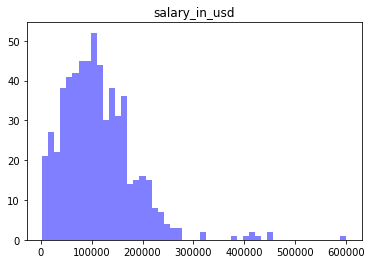

In [17]:
# check the histogram for salary
plt.hist(int_cols['salary_in_usd'], bins=50, alpha=0.5, color='blue')
plt.title('salary_in_usd')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f02ee539670>,
 'caps': [<matplotlib.lines.Line2D at 0x7f02ee539af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f02ee5393a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f02ee4ca0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f02ee4ca3a0>],
 'means': []}

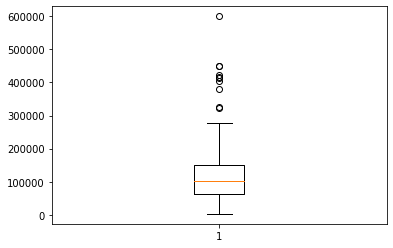

In [22]:
# check if there outliers
plt.boxplot(int_cols['salary_in_usd'])

In [23]:
# there outliers 7 values there salary exceed ~ 300K

In [24]:
# relation between years and salary
grouped = int_cols.groupby('work_year').agg({'salary_in_usd': 'sum'})

([<matplotlib.axis.XTick at 0x7f02ee36b460>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

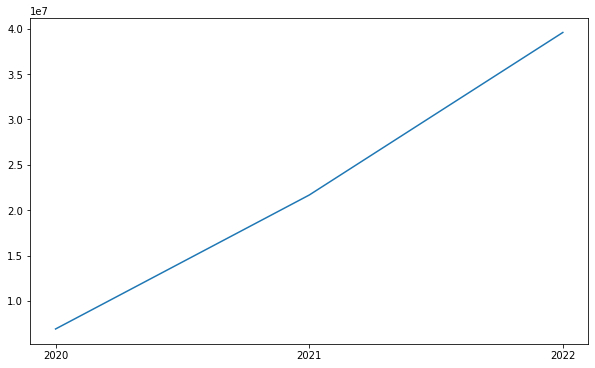

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(grouped)
plt.xticks([2020,2021,2022])

In [ ]:
# positive linear relation between the salary and the year

In [29]:
# now check the remote ratio
int_cols['remote_ratio'].value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

([<matplotlib.axis.XTick at 0x7f02ede07f40>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

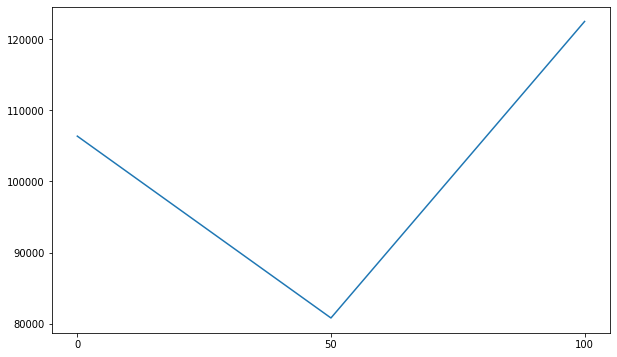

In [34]:
# now check the remote with years and with salary and if it effect on it or no
grouped = int_cols.groupby('remote_ratio').agg({'salary_in_usd': 'mean'})
plt.figure(figsize=(10, 6))
plt.plot(grouped)
plt.xticks([0,50,100])

In [35]:
# The 50% remotly job, so bad in income
# The 100% remote give best salaries 

([<matplotlib.axis.XTick at 0x7f02ee24cf40>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

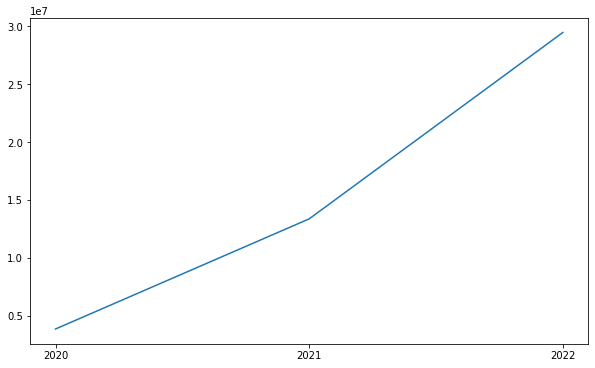

In [43]:
# check it with the years
rem100 = int_cols[int_cols['remote_ratio']==100]
grouped = rem100.groupby('work_year').agg({'salary_in_usd': 'sum'})
plt.figure(figsize=(10, 6))
plt.plot(grouped)
plt.xticks([2020,2021,2022])

([<matplotlib.axis.XTick at 0x7f02ee1073a0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

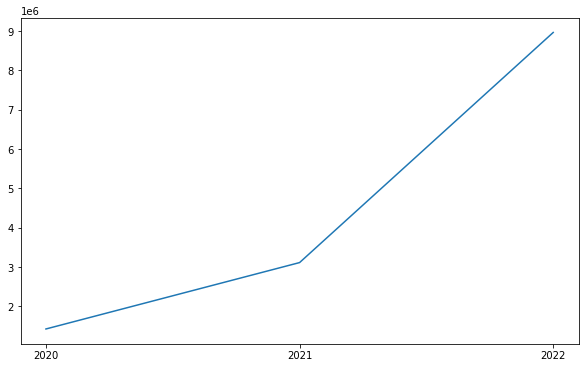

In [44]:
rem100 = int_cols[int_cols['remote_ratio']==0]
grouped = rem100.groupby('work_year').agg({'salary_in_usd': 'sum'})
plt.figure(figsize=(10, 6))
plt.plot(grouped)
plt.xticks([2020,2021,2022])

([<matplotlib.axis.XTick at 0x7f02edea1370>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

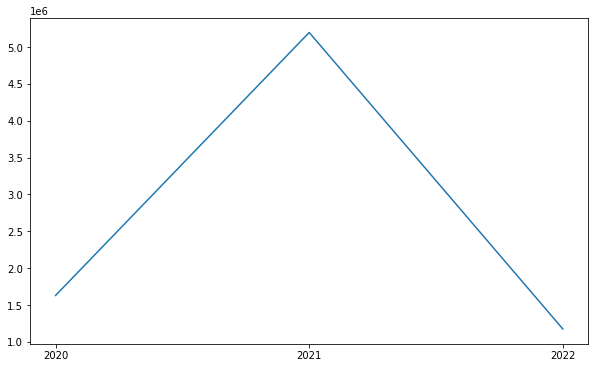

In [45]:
rem100 = int_cols[int_cols['remote_ratio']==50]
grouped = rem100.groupby('work_year').agg({'salary_in_usd': 'sum'})
plt.figure(figsize=(10, 6))
plt.plot(grouped)
plt.xticks([2020,2021,2022])

from the previoues



*   50% : The companies which turned its work 50% to online in corona, they salaries was be max at corona, after that, when they back to work offline they reduce the salries
*   100: The companies which work online only, the salaries with years increase 
*  0: The companies which not turned its work to online (always offline)they salaries was larger than the online employees




# Object data analysis

In [46]:
object_cols = df.select_dtypes(include=['object'])
object_cols.head()

,experience_level,employment_type,job_title,employee_residence,company_location,company_size
0,MI,FT,Data Scientist,DE,DE,L
1,SE,FT,Machine Learning Scientist,JP,JP,S
2,SE,FT,Big Data Engineer,GB,GB,M
3,MI,FT,Product Data Analyst,HN,HN,S
4,SE,FT,Machine Learning Engineer,US,US,L


In [47]:
# add salary column, to study features respect to it
object_cols['salary'] = df['salary_in_usd']
object_cols.head()

<ipython-input-47-ac50b0628c28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_cols['salary'] = df['salary_in_usd']


,experience_level,employment_type,job_title,employee_residence,company_location,company_size,salary
0,MI,FT,Data Scientist,DE,DE,L,79833
1,SE,FT,Machine Learning Scientist,JP,JP,S,260000
2,SE,FT,Big Data Engineer,GB,GB,M,109024
3,MI,FT,Product Data Analyst,HN,HN,S,20000
4,SE,FT,Machine Learning Engineer,US,US,L,150000


SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64
FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer             

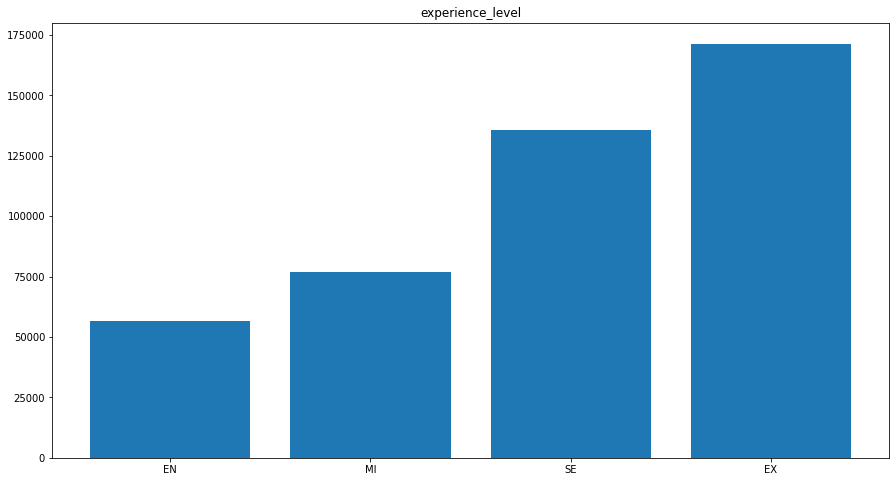

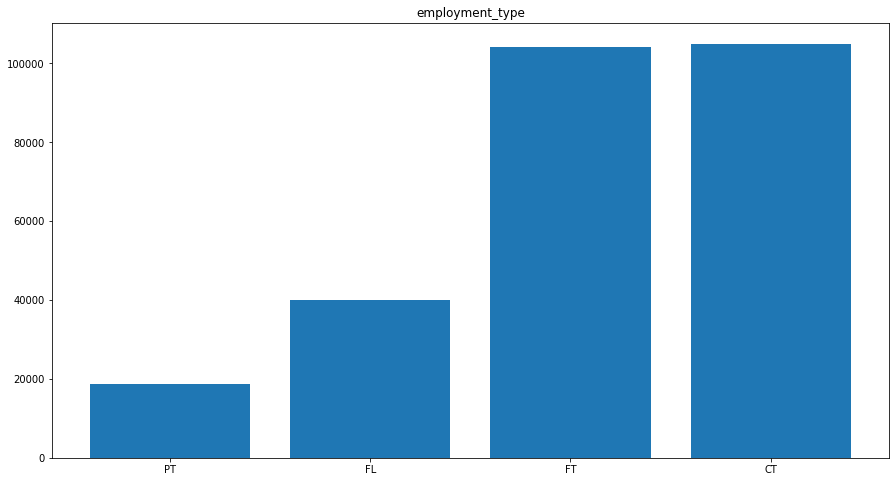

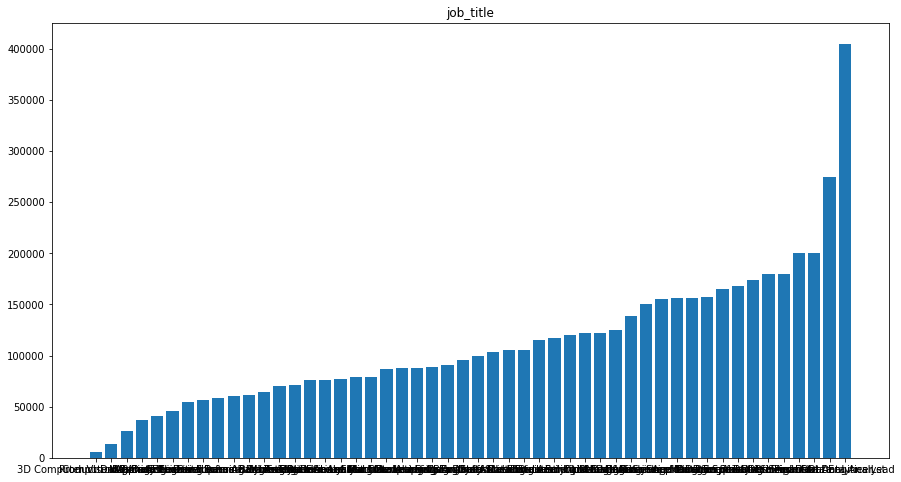

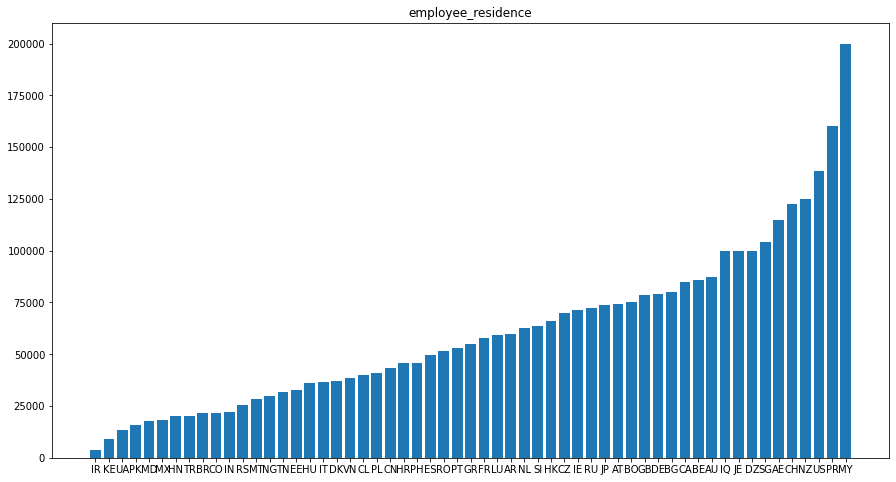

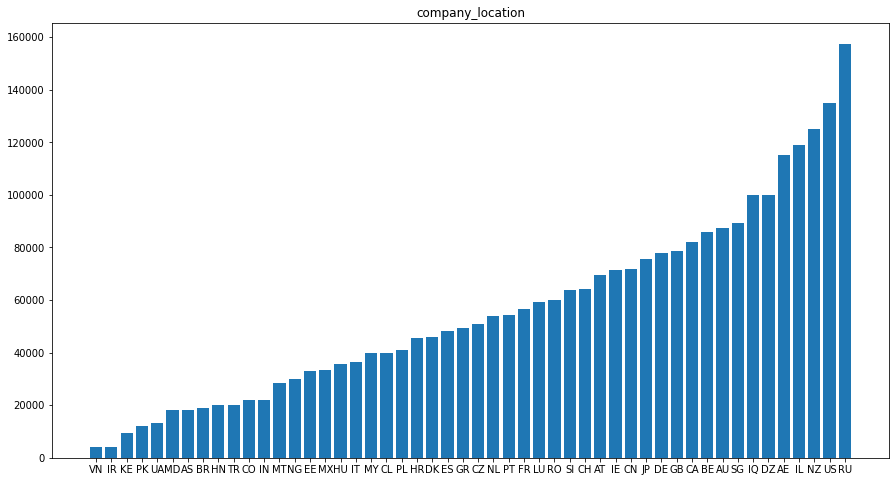

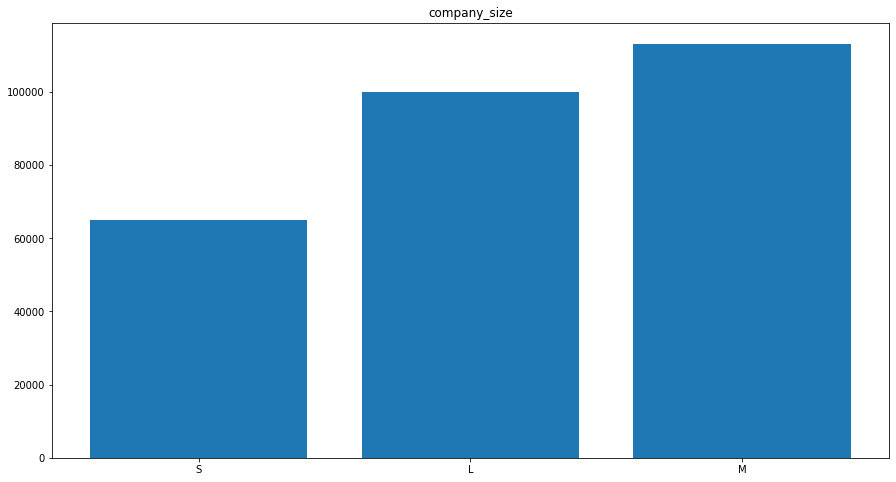

In [74]:
for i in range(len(object_cols.columns)-1):
  print(object_cols[object_cols.columns[i]].value_counts())

  grouped = object_cols.groupby(object_cols.columns[i]).agg({'salary': 'median'})
  grouped.reset_index(inplace=True)
  grouped = grouped.sort_values(by='salary')
  plt.figure(figsize=(15, 8))
  plt.bar(grouped[object_cols.columns[i]],grouped['salary']) 
  plt.title(str(object_cols.columns[i]))

From the previoues data
Salary depends on experiance: expert > senior > mid level > intern

Salary depends on emplyment_type: Full time job and CT git more salaries 

if the employee in these locations get more salary JQ<JE<DZ<SG<AE<CH<NZ<US<PR<MY

company locations for more salary : RU > US > NZ

finally nthe meduim company give more salary